In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe =pd.read_csv('Advertising.csv');
print(dataframe)


     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


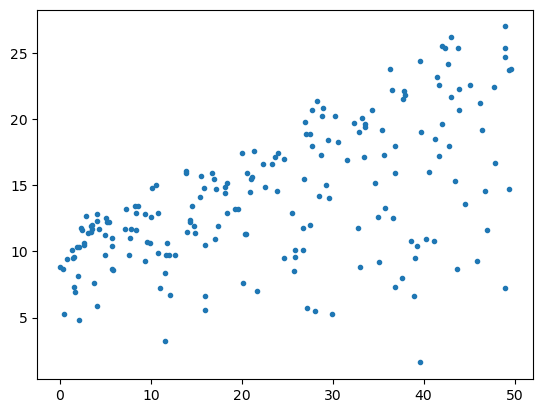

In [2]:
X = dataframe.values[:, 2]
# print(X)
y = dataframe.values[:, 4]
# print(y)
plt.scatter(X, y, marker='.')
plt.show()

In [10]:
def predict(X, weight, bias):
    return weight*X + bias
def cost_function(X, y, weight, bias):
    n = len(X)
    sum_error = 0
    for i in range(n):
        sum_error += (y[i] - weight*X[i]- bias)**2
    return sum_error/n


In [11]:
# Hàm update weight, bias 
def update_weight(X, y, weight, bias, learning_rate):
    n = len(X)
    weight_temp = 0.0
    bias_temp = 0.0
    for i in range(n):
        weight_temp += -2*X[i] * (y[i] -(weight*X[i] + bias))
        bias_temp += -2*(y[i] -(weight*X[i] + bias))
    weight -= (weight_temp/n)*learning_rate  
    bias -= (bias/n)*learning_rate
    return weight, bias

In [18]:
# Hàm train, truyền thêm vào số lần lặp
def train(X, y, weight, bias, learning_rate, iter):
#     Update lại weight và tính bias
    cos_his = []
    for i in range(iter):
        weight, bias = update_weight(X, y, weight, bias, learning_rate)
        cost = cost_function(X, y, weight, bias)
        cos_his.append(cost)
    return weight, bias, cos_his


In [21]:
weight, bias, cos_his = train(X, y, 0.03, 0.0014, 0.001, 60)
print(weight)
print(bias)
print(cos_his)
# cos_his đã giảm dần

0.4872849963998045
0.0013995800619440123
[86.27140264333552, 54.81435831869096, 46.273050152017014, 43.95388938522459, 43.32418412182851, 43.15320475400453, 43.106779961798054, 43.09417459698823, 43.09075197783645, 43.089822686356314, 43.08957038947854, 43.089501912651855, 43.08948334691482, 43.08947833331981, 43.089476999369765, 43.089476664564934, 43.089476601031265, 43.08947661116401, 43.08947664129342, 43.089476676855, 43.089476713889944, 43.0894767513256, 43.08947678886944, 43.089476826442805, 43.08947686402391, 43.08947690160706, 43.089476939190554, 43.089476976774094, 43.089477014357435, 43.089477051940605, 43.08947708952359, 43.0894771271064, 43.08947716468905, 43.08947720227144, 43.08947723985368, 43.08947727743572, 43.08947731501764, 43.08947735259928, 43.089477390180754, 43.08947742776208, 43.08947746534318, 43.08947750292409, 43.08947754050485, 43.0894775780854, 43.08947761566574, 43.08947765324593, 43.08947769082593, 43.08947772840574, 43.089477765985336, 43.08947780356477

In [20]:
# Dự doán gọi hàm predict
print("Gia tri dự đoán")
predict(19, weight, bias)

9.259814571661007

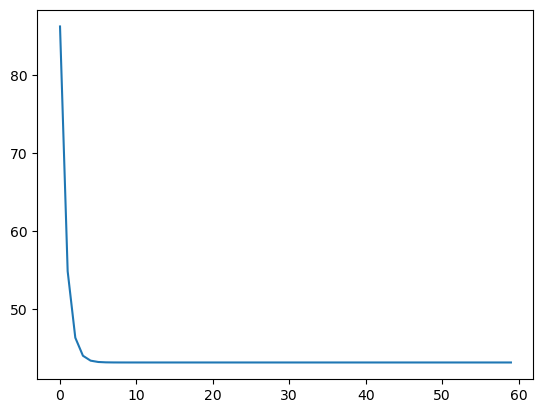

In [26]:

solanLap = [i for i in range(60)]
plt.plot(solanLap, cos_his)
plt.show()
# Khi tăng số lần lặp lên thì cost của chúng ta sẽ giảm đi
# Giảm đến 1 mức nào nó thì đường giảm ko thay đổi nhiều,
# Vì vậy khi tăng số lần lặp từ 30 - 60 thì cái cost thay đổi ít ở phía 